# Assignment 2
# Name : Ankit Kumar Bhakar
# Roll No.:22M1077

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#reading the given audio file
import scipy.io.wavfile as wav
sampling_rate, samples = wav.read('aa.wav')

MAtching as mentioned in the question the sampling rate of the audio file is 8 kHz

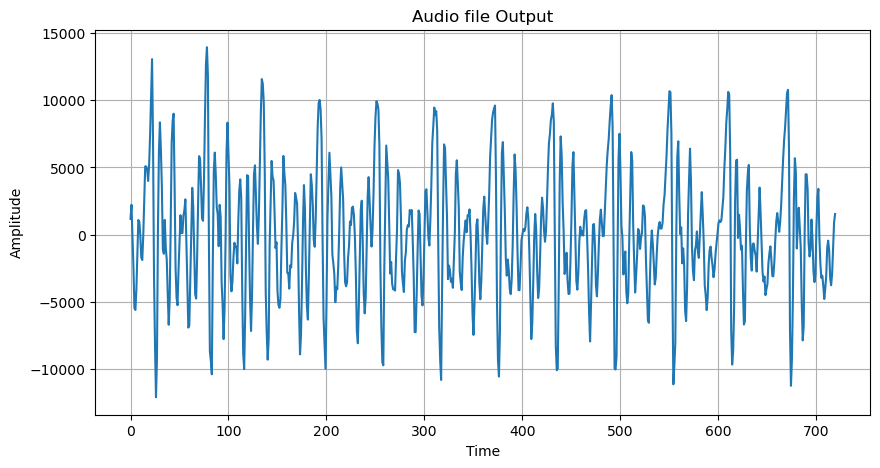

In [3]:
#Visualize the audio file
plt.figure(figsize=(10,5))
plt.plot(samples)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Audio file Output')
plt.grid()
plt.show()

Part 1:<br>Apply pre-emphasis to the signal. 

pre-emphasis filter 
$$ H(z) = 1 - \alpha z^{-1} $$
where $\alpha$ is a constant.  let $\alpha$ be 0.95. Hence, the filter  given by
$$ H(z) = 1 - 0.95 z^{-1} $$
$$  \frac{Y(z)}{X(z)} = 1 - 0.95 z^{-1} $$
Where, Y(z) is the z-transform of the output signal and X(z) is the z-transform of the input signal to the filter.
$$  Y(z) = X(z) - 0.95 X(z) z^{-1} $$
Hence, after taking inverse z transform, we get
$$ y[n] = x[n] - 0.95 x[n - 1] $$


In [4]:
pre_emphasis = np.zeros(len(samples))
pre_emphasis[0] = samples[0]
for i in range(1,len(samples)):
    pre_emphasis[i] = samples[i] - 0.95 * samples[i-1]

Visualization of the pre-emphasized signal

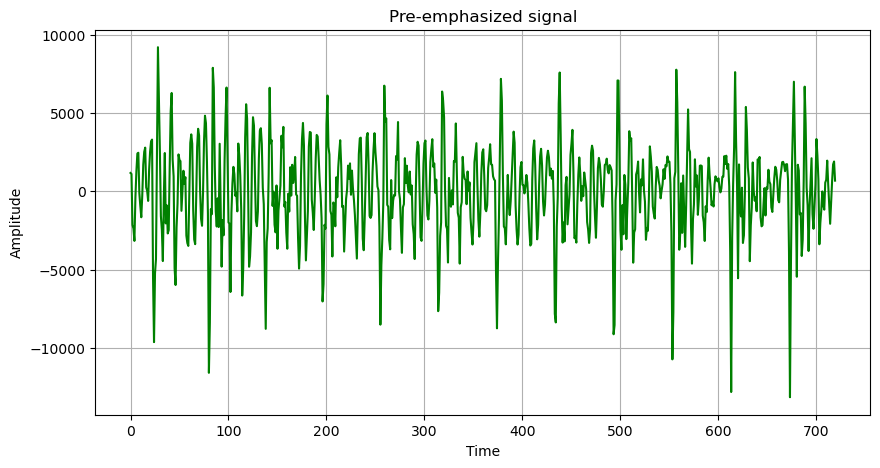

In [5]:
plt.figure(figsize=(10,5))
plt.plot(pre_emphasis,'g')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Pre-emphasized signal')
plt.grid()
plt.show()

Combined Plot of both without and with pre emphasis signal 

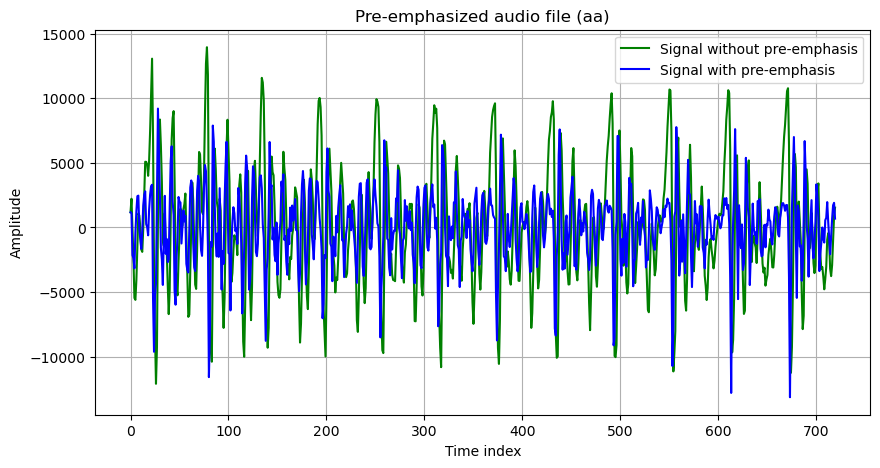

In [6]:
plt.figure(figsize=(10,5))
plt.plot(samples ,'g',label = "Signal without pre-emphasis")
plt.plot(pre_emphasis,'b',label = "Signal with pre-emphasis")
plt.xlabel('Time index')
plt.ylabel('Amplitude')
plt.title('Pre-emphasized audio file (aa)')
plt.legend()
plt.grid()
plt.show()

 Part 2:<br>
 

In [7]:
#Hamming window of duration 30 ms

hamming_window = np.hamming(30e-3 * sampling_rate)
hamming_window = np.pad(hamming_window, ((len(pre_emphasis)-len(hamming_window))//2 , (len(pre_emphasis)-len(hamming_window))//2), 'constant')

# Window the pre-emphasized audio  signal
windowed_out = pre_emphasis * hamming_window

## Find the FFT of the windowed output signal
ft_aa = np.fft.fft(windowed_out)
ft_aa = np.abs(ft_aa)
f_aa = np.fft.fftfreq(len(ft_aa), 1/sampling_rate)

Narrowband magnitude spectrum

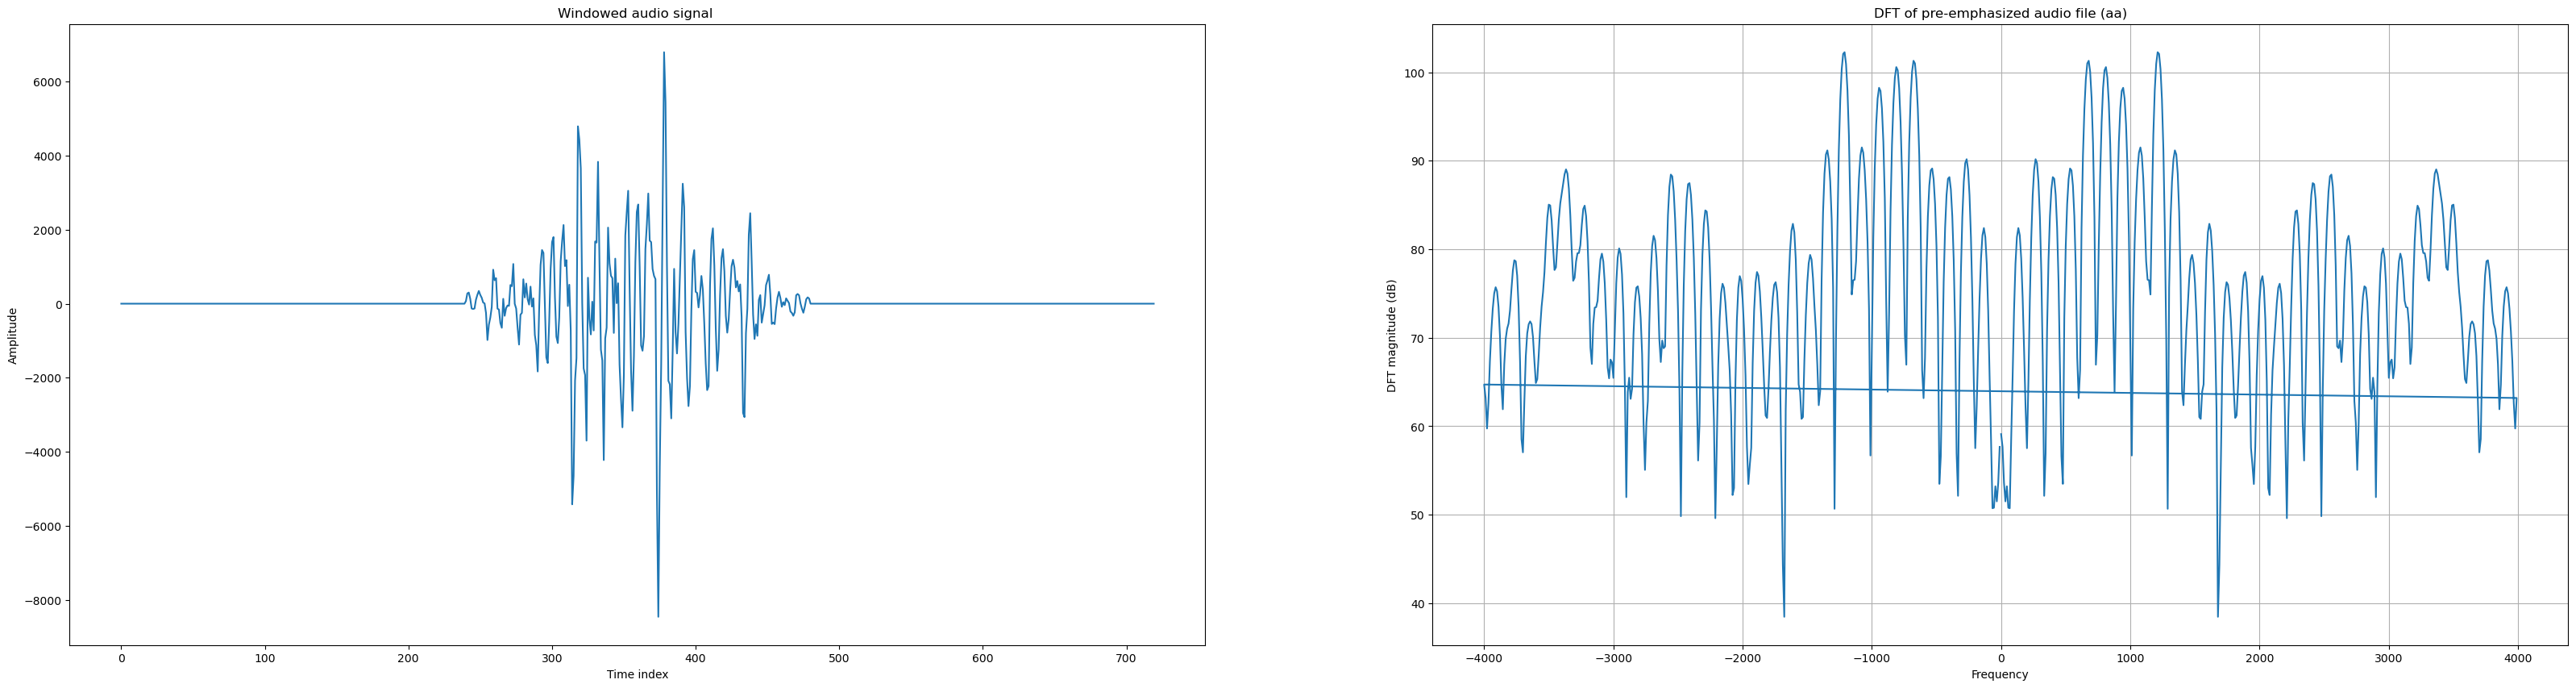

In [8]:
plt.figure(figsize=(40,10))
plt.subplot(1,2,1)
plt.plot(windowed_out)

plt.xlabel('Time index')
plt.ylabel('Amplitude')
plt.title('Windowed audio signal ')

plt.subplot(1,2,2)
plt.plot(f_aa, 20*np.log10(ft_aa))
plt.xlabel('Frequency')
plt.ylabel('DFT magnitude (dB)')
plt.title('DFT of pre-emphasized audio file (aa)')
plt.grid()
plt.show()

Comments:<br>
- The signal with windowed signal with pre-emphasis applied is shown on left and its Fourier magnitude spectrum is shown on right in the above figure.   
- The effect of pre-emphasis is shown clearly in the figure as we can see that the Fourrier magnitude spectrum does not fall off for the higher frequencies (which is the case for the original signal).

Part3<br>

In [9]:
#calculation of the Auto-correlation of the windowed signal 
def autocorrelation_func(signal, lags):
    
    autocorrelation_ = np.zeros(lags)
    for i in range(lags):
        autocorrelation_[i] = np.sum(signal[i:]*signal[:len(signal)-i])

    return autocorrelation_
autocorrelation = autocorrelation_func(windowed_out, 100)

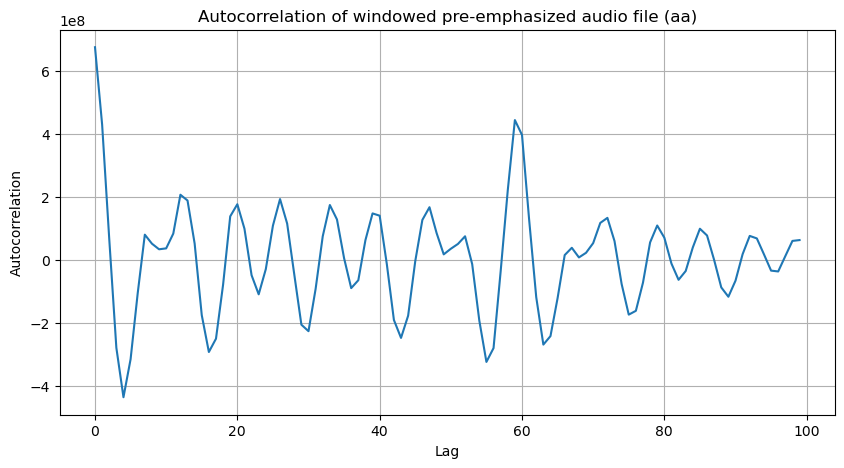

In [10]:
plt.figure(figsize=(10,5))
plt.plot(autocorrelation)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of windowed pre-emphasized audio file (aa)')
plt.grid()
plt.show()

- From the plot of the auto-correlation obtained above we can see that there are peaks at repeated lags of 60. These are the result of the harmonics present in the signal.

In [11]:
#To find the LP coefficients using Levinson-Durbin algorithm for first 10 coefficiwnts

def Levinson_Durbin(autocorrelation, order):
    
    lp_coefficients = np.zeros((order+1, order+1))
    prediction_error = np.zeros(order+1)

    reflection_coefficients = np.zeros(order+1)

    prediction_error[0] = autocorrelation[0]

    # for i = 1
    reflection_coefficients[1] = autocorrelation[1]/prediction_error[0]
    lp_coefficients[1][1] = reflection_coefficients[1]

    prediction_error[1] = (1 - reflection_coefficients[1]**2)*prediction_error[0]

    # for i = 2 to order

    for i in range(2, order+1):
        summation = 0
        for j in range(1, i):
            summation += lp_coefficients[i-1][j]*autocorrelation[i-j]
        
        reflection_coefficients[i] = (autocorrelation[i] - summation)/prediction_error[i-1]

        lp_coefficients[i][i] = reflection_coefficients[i]

        for j in range(1, i):
            lp_coefficients[i][j] = lp_coefficients[i-1][j] - reflection_coefficients[i]*lp_coefficients[i-1][i-j]

        prediction_error[i] = (1 - reflection_coefficients[i]**2)*prediction_error[i-1]

    return lp_coefficients,prediction_error

lp_coefficients , error_energy = Levinson_Durbin(autocorrelation, 10)

gain = np.sqrt(error_energy)            

In [12]:
orders = [2,4,6,8,10]

for order in orders:
    print("The coefficients for p="+str(order)+" are:", str(lp_coefficients[order][1:order+1]))

The coefficients for p=2 are: [ 0.96454776 -0.51474629]
The coefficients for p=4 are: [ 0.68322148 -0.13507646 -0.28905557 -0.16557719]
The coefficients for p=6 are: [ 0.73630801 -0.14236591 -0.31958052 -0.28524925  0.28348265 -0.18881888]
The coefficients for p=8 are: [ 0.5881573  -0.11510746 -0.22581153 -0.54813899  0.03861646 -0.09802675
  0.21389618 -0.58065459]
The coefficients for p=10 are: [ 0.71103761 -0.06174574 -0.2354676  -0.55416698  0.16613212  0.05255368
  0.2772599  -0.72267503  0.17179372  0.15318719]


Plot of the Error Energy Function<br>calculated the error energy in the implementation of the Levinson-Durbin recursion
$$ Error \: energy = r[0] - \sum_{k} a_k \times r[k] $$


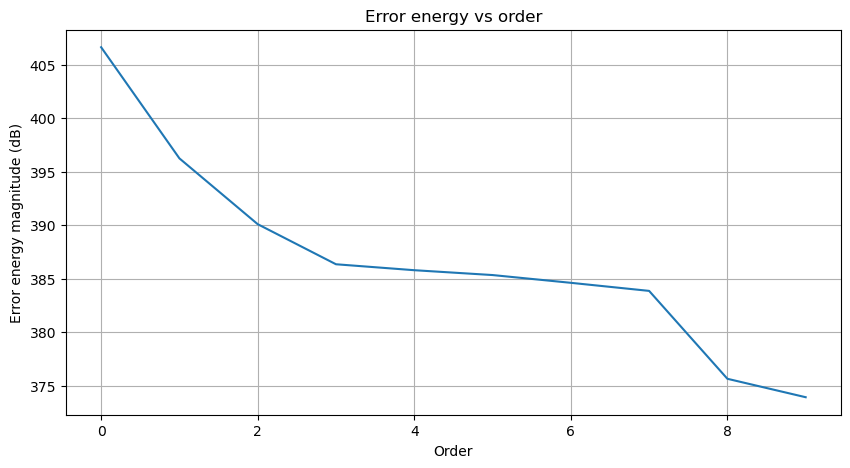

In [13]:
error_energy = np.zeros(10)
error_energy[0] = autocorrelation[0]

for i in range(1,10):
    error_energy[i] = autocorrelation[0] - np.dot(lp_coefficients[i][1:i+1].reshape(-1),autocorrelation[1:i+1])

plt.figure(figsize=(10,5))
plt.plot(20*np.log(error_energy))

plt.xlabel('Order')
plt.ylabel('Error energy magnitude (dB)')
plt.title('Error energy vs order')
plt.grid()
plt.show()

Part 4<br>Show the pole-zero plots of the estimated all-pole filter for p=6,10; comment

In [14]:
from scipy import signal
plt.style.use('seaborn-darkgrid')
def poleZeroPlot(b,a,order):

    poles = np.zeros(len(a))
    poles[0]=1
    poles[1:len(a)] = -a[1:len(a)]
    b=[b]
    z, p, k = signal.tf2zpk(b, poles)
    p = p[p!=0]
    
    fig = plt.figure(figsize=(5,5))
    ax=fig.add_subplot(1, 1, 1)
    
    plt.plot(np.real(z), np.imag(z), 'ob')
    plt.plot(np.real(p), np.imag(p), 'sr',markersize=5,fillstyle="full")
    circ = plt.Circle((0, 0), radius=1,facecolor='None',color='black', ls='solid', alpha=0.1)
    ax.add_patch(circ)
    plt.axhline(0,color='black',alpha=0.4)
    plt.axvline(0,color='black',alpha=0.4)
    plt.ylim((-2.0, 2.0))
    plt.xlim((-2.0,2.0))
    plt.legend(['Zeros', 'Poles'])
    plt.ylabel('Real')
    plt.xlabel('Imaginary')
    plt.title('Pole-Zero Plot for LP filter with order '+str(order))
    plt.grid()
    plt.show()

For order = 6

/var/folders/0m/65ffg32d5djd3fqht1c13kdh0000gn/T/ipykernel_8752/1305156274.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circ = plt.Circle((0, 0), radius=1,facecolor='None',color='black', ls='solid', alpha=0.1)


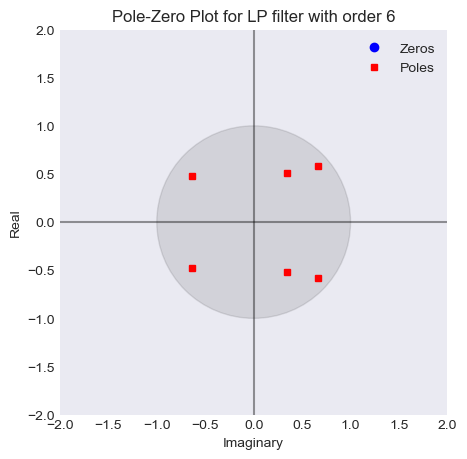

In [15]:
poleZeroPlot(gain[6],lp_coefficients[6][:],6)

For order = 10

/var/folders/0m/65ffg32d5djd3fqht1c13kdh0000gn/T/ipykernel_8752/1305156274.py:17: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circ = plt.Circle((0, 0), radius=1,facecolor='None',color='black', ls='solid', alpha=0.1)


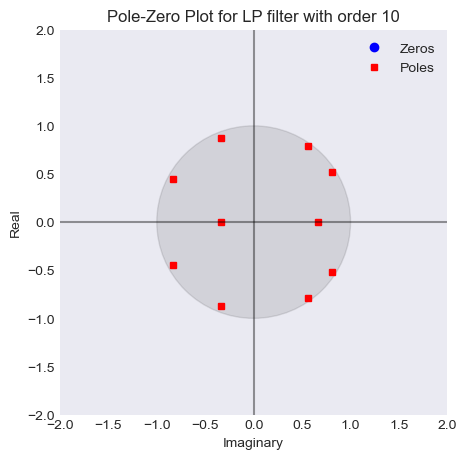

In [16]:
poleZeroPlot(gain[10],lp_coefficients[10][:],10)

Comments: 
- all the poles in both the cases are inside the unit circle. Hence the LP filter design is stable.
- By looking at the values and also by the graph it is very evident that the poles for p=10 are closer to the unit circle as compared to the poles of the p=6. 
- As we increase p, the actual specturm is closely traced. Hence, as spectrum of larger p has lesser bandwidth, they are closer to the unit circle.


Part 5<br>

In [17]:
#computed for LP filter
gain

array([26014.46894783, 20058.51601538, 17197.01933469, 15657.81321431,
       15441.68580839, 15267.4599599 , 14992.82783309, 14712.31310423,
       11978.02988378, 11472.46446395, 11337.05712869])

In [18]:
from scipy.signal import freqz

def plot_spectrum(order,lp_coefficients_,gain_):
    for i in range(1,order+1):
        poles = np.zeros_like(lp_coefficients_[i])
        poles[0] = 1
        poles[1:] = -lp_coefficients_[i][1:] 
        w,h = freqz(gain_[i],poles)

        plt.figure(figsize=(10,5))
        plt.title("LPC spectrum for poles="+str(i))
        plt.plot(f_aa, 20*np.log10(np.abs(ft_aa)), label = 'Original Spectrum')
        plt.plot(w*sampling_rate/(2*np.pi),20*np.log10(abs(h)),linewidth=2, label = "LPC Estimate Spectrum")
        plt.ylabel("Fourier Spectrum Magnitude(dB)")
        plt.xlabel("Frequency")
        plt.xlim(xmin=0)
        plt.grid()
        plt.show()

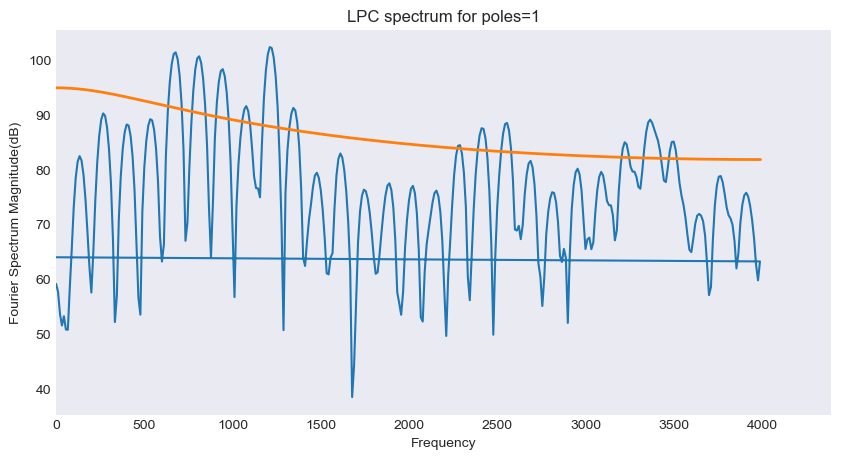

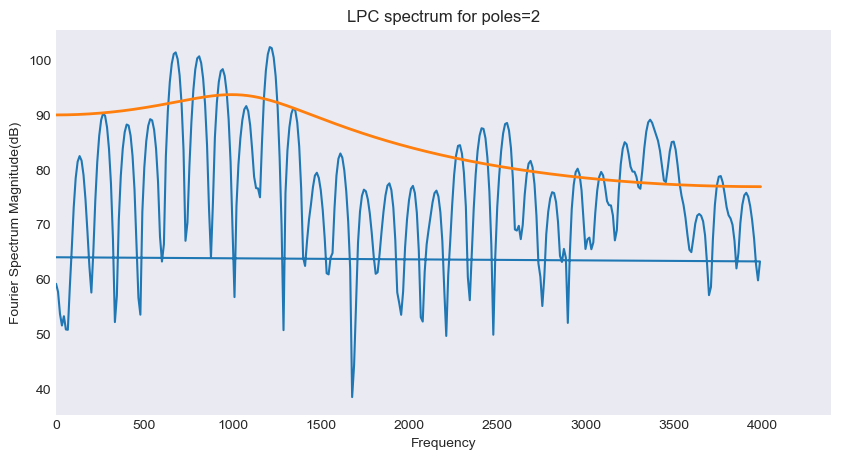

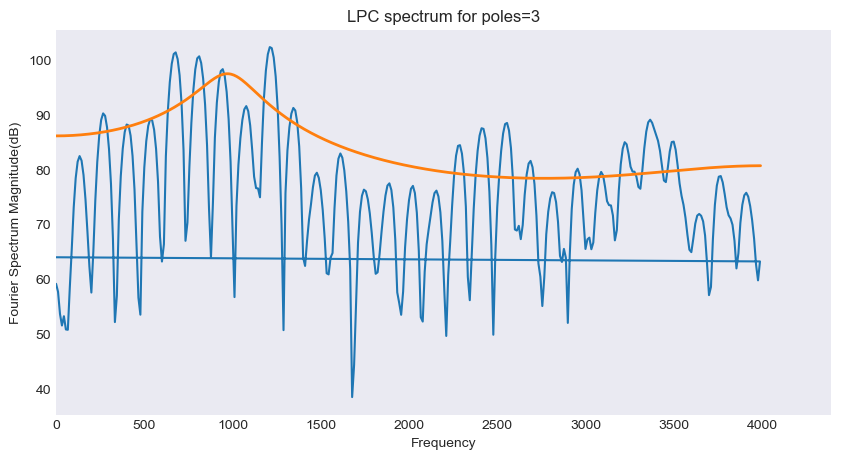

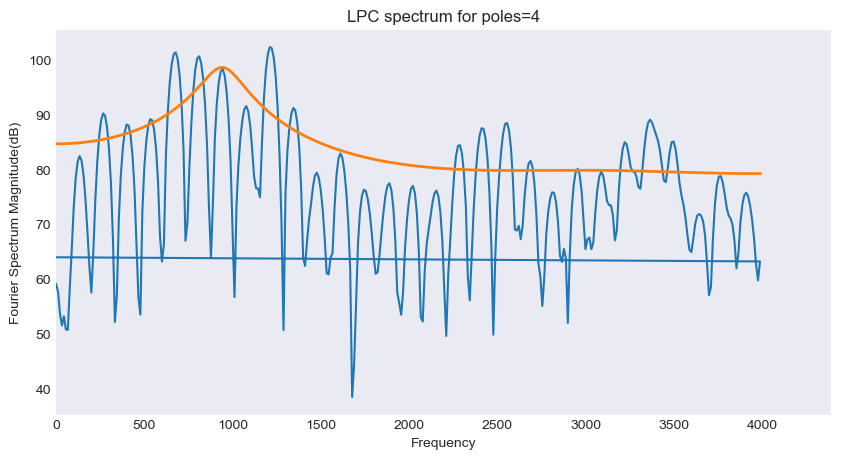

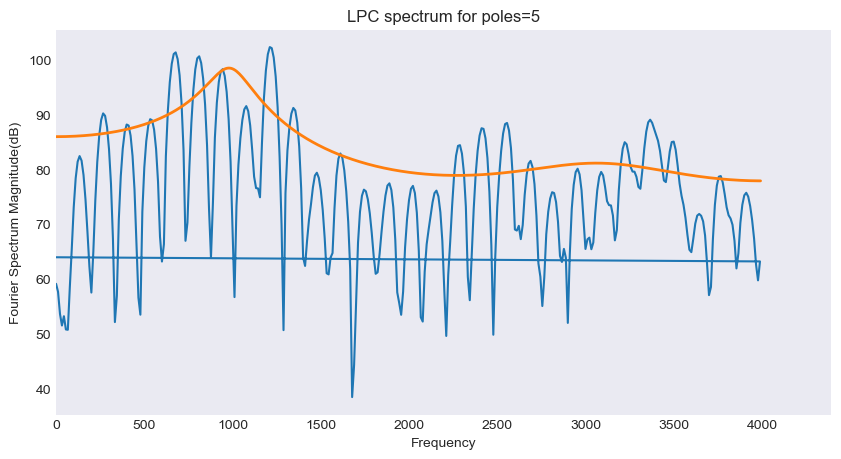

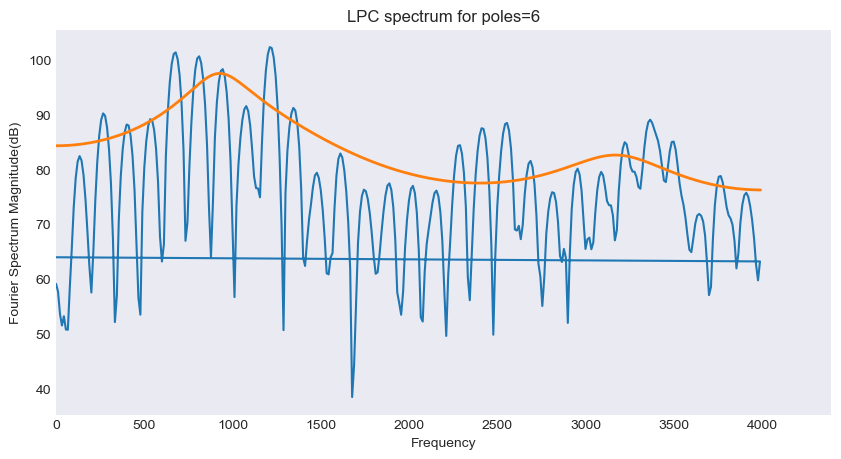

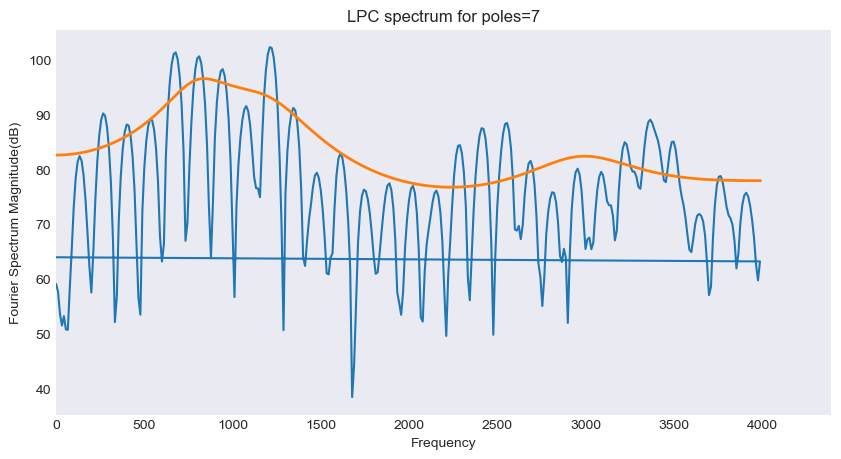

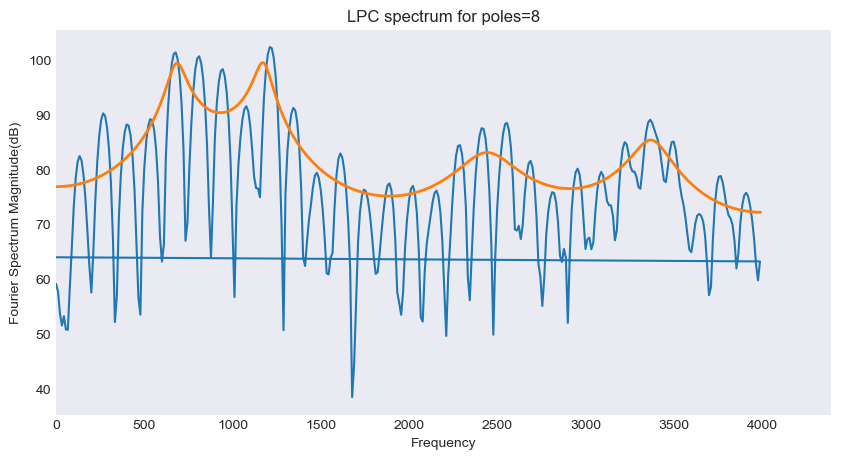

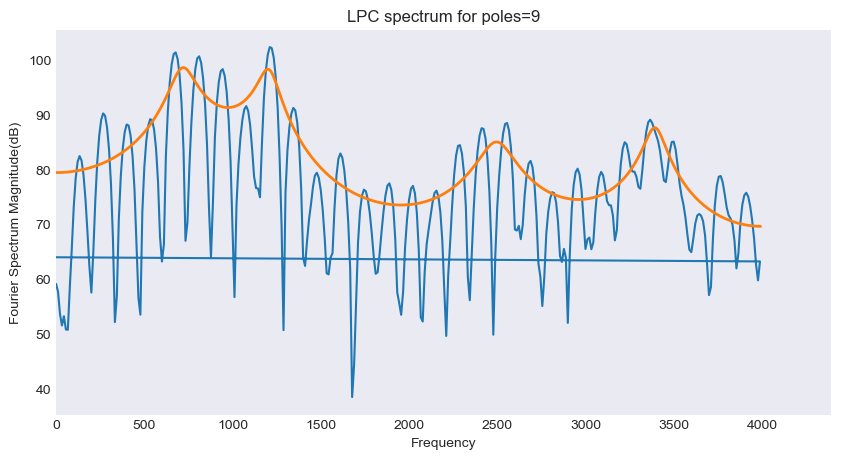

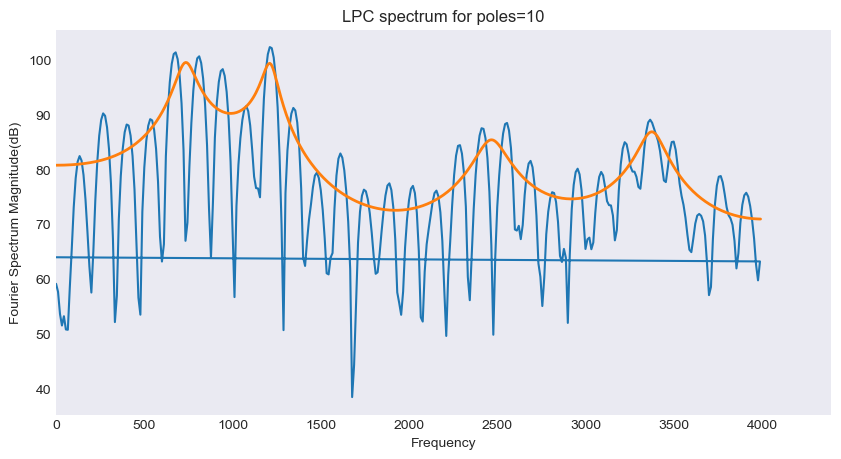

In [19]:
order = 10

plot_spectrum(order,lp_coefficients,gain)

Commments:<br>
- We observe that the estimated spectrum closely matches the short-time magnitude spectrum
- As the order increases, the estimated spectrum closely matches the short-time magnitude spectrum
- For order 8, the estimated spectrum captures all the formants present in the signal



Part 6<br>


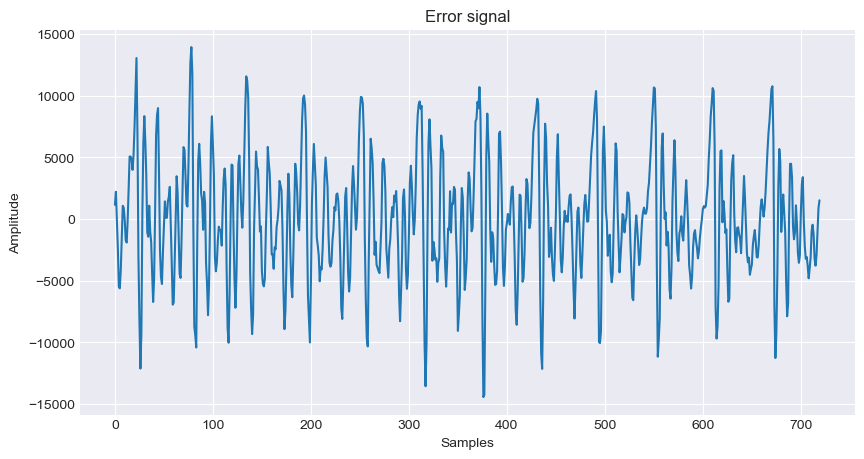

In [20]:
lp_10 = lp_coefficients[10][1:]

# Inverse filtering using the LPC coefficients for windowed signal

estimated_out = np.zeros(len(windowed_out))

for i in range(len(estimated_out)):
    summation = 0
    for j in range(0,order):
        # ignore the negative indices
        if i-j >= 0:
            summation += lp_10[j]*windowed_out[i-j]
    
    estimated_out[i] = summation

error_signal = samples - estimated_out 


plt.figure(figsize=(10,5))
plt.plot(error_signal)
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Error signal')
plt.show()

Commments: <br>
error signal has larger magnitude at the starting of the window. Also the error will be higher near the glottal pulses 

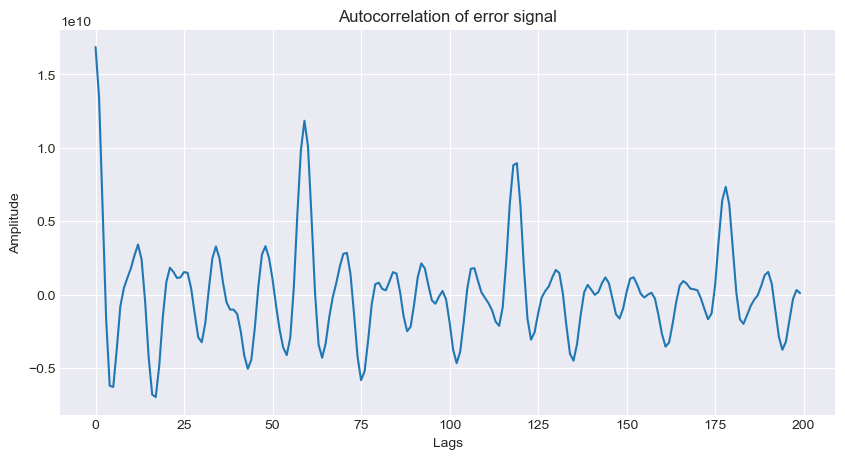

In [21]:
autocorrelation_error = autocorrelation_func(error_signal,200)

plt.figure(figsize=(10,5))
plt.plot(autocorrelation_error)
plt.xlabel('Lags')
plt.ylabel('Amplitude')
plt.title('Autocorrelation of error signal')
plt.show()

autocorrelation function has peaks after a periodic lag. Visually, we can see that the lag is roughly 60 samples. Hence, as we know that the sampling rate is 8 kHz, the pitch period can be found out as follows.

$ Pitch = Sampling rate \: / \: 60 $<br>
$ Pitch = 8000 / 60 = 133.33 Hz $

Now autocorrelation of the residual error signal with the original speech signal.

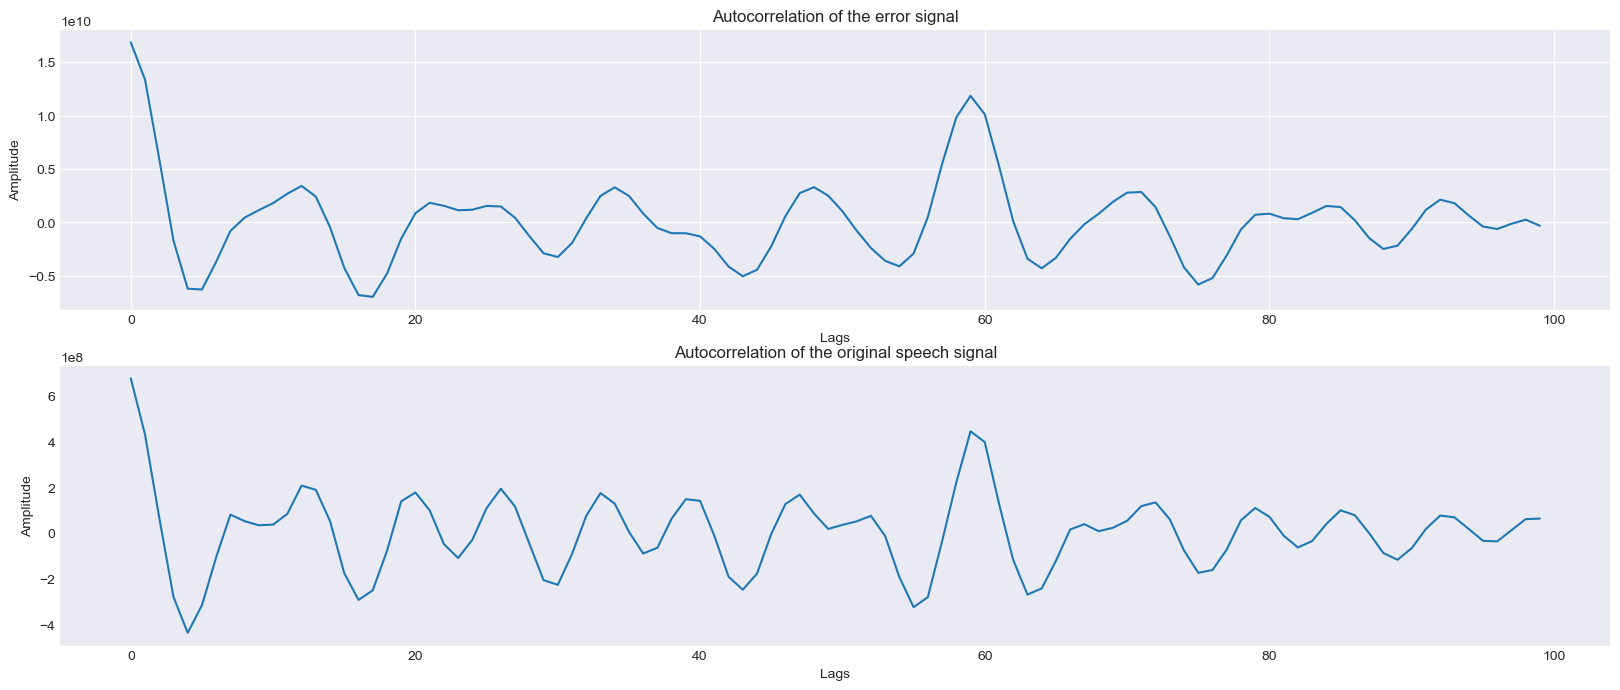

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.plot(autocorrelation_error[:100])
plt.xlabel('Lags')
plt.ylabel('Amplitude')
plt.title('Autocorrelation of the error signal')

plt.subplot(2,1,2)
plt.plot(autocorrelation)
plt.xlabel('Lags')
plt.ylabel('Amplitude')
plt.title('Autocorrelation of the original speech signal')
plt.grid()
plt.show()

Comments:<br>
we can see that the auto-correlation function for the error signal and that of the original speech signal have spikes at period lags of 60. These spikes correspond to the harmonics present in the original speech signal.

Part 7<br>


Solution<br>
Using the LP coefficients obtained from the above analysis to synthesize the speech


In [23]:
def resynthesize(duration,pitch, gain, lp_coefficients, sampling_rate):

    impulse = np.zeros(int(duration*sampling_rate))
    pitch_samples = np.floor(sampling_rate/pitch)
    for i in range(len(impulse)):
        if (i%pitch_samples == 0):
            impulse[i] = 1

    lp_coefficients = -lp_coefficients
    lp_coefficients = lp_coefficients.tolist()
    den_terms = [1] + lp_coefficients
    
    synthesized_speech = signal.lfilter([gain],den_terms,impulse)
    synthesized_speech = np.int16(synthesized_speech/np.max(np.abs(synthesized_speech)) * 32767)
    timeSample = np.linspace(0, duration, int(duration*sampling_rate))

    return impulse, synthesized_speech, timeSample    

In [24]:
def resynthesize(duration,pitch, gain, lp_coefficients, sampling_rate):
    impulse = np.zeros(int(duration*sampling_rate))
    pitch_samples = np.floor(sampling_rate/pitch)
    for i in range(len(impulse)):
        if (i%pitch_samples == 0):
            impulse[i] = 1

    lp_coefficients = -lp_coefficients
    lp_coefficients = lp_coefficients.tolist()
    den_terms = [1] + lp_coefficients
    
    synthesized_speech = signal.lfilter([gain],den_terms,impulse)   
    timeSample = np.linspace(0, duration, int(duration*sampling_rate))

    return impulse, synthesized_speech, timeSample    

For de-emphasis using the filter with below characteristics<br>
$$ H(z) = \frac{1}{1 - \alpha z^{-1}} $$<br>
the output signal and $x[n]$ is the excitation signal.
$$ y[n] = x[n] + \alpha y[n-1] $$

In [25]:
def de_emphasis(signal,alpha):
    output = np.zeros(len(signal))
    output[0] = signal[0] # Assuming initial rest
    for i in range(1,len(signal)):
        output[i] = signal[i] - alpha*signal[i-1]
        
    return output

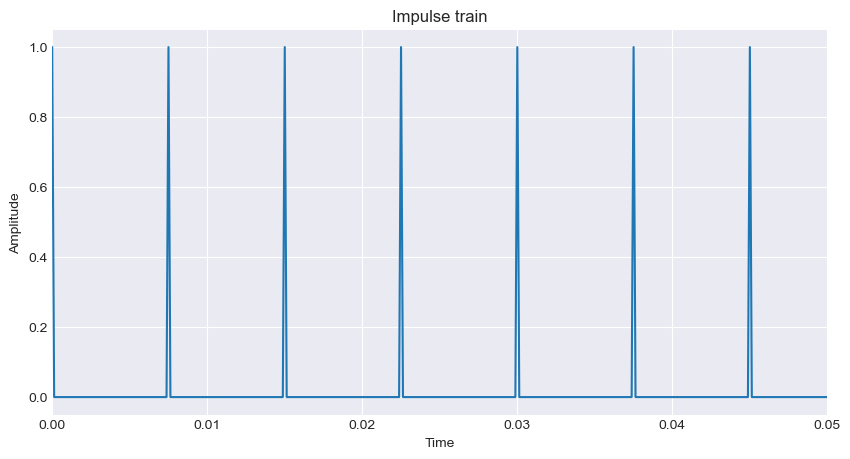

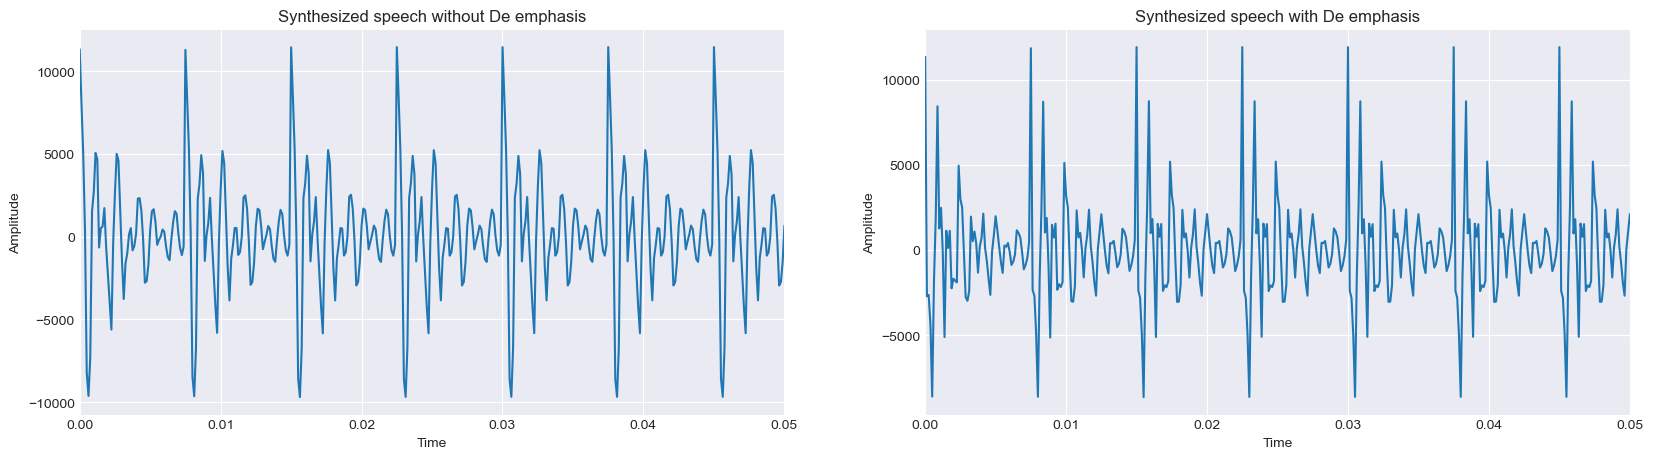

In [26]:
impulse_train, synthesized, time = resynthesize(0.5,133,gain[10],lp_10,8000)

de_emphasis = de_emphasis(synthesized,0.95)

# the waveform of the synthesized speech
plt.figure(figsize=(10,5))
plt.plot(time, impulse_train)
plt.xlim(0,0.05)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Impulse train')

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlim(0,0.05)
plt.plot(time, synthesized)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Synthesized speech without De emphasis')

plt.subplot(1,2,2)
plt.plot(time, de_emphasis)
plt.xlim(0,0.05)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Synthesized speech with De emphasis')
plt.show()